In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data merge1

In [2]:
data_fix = pd.read_excel("./money_trend_all.xlsx", index_col=0)

In [ ]:
data_fix.index.name = ''

In [ ]:
data_fix.columns = ["고객예탁금", "장내파생상품_예수금", "대고객_환매조건부채권_매도잔고", "위탁매매_미수금", "미수금_대비_반대매매_금액","미수금_대비_반대매매_비중"]

In [ ]:
data_fix.index = data_fix.index.str.replace('/', '-')

In [ ]:
for i in data_fix.columns :
    data_fix[i] = data_fix[i].str.replace(',', '')
    data_fix[i] = data_fix[i].str.replace('-', '0').astype(float)

In [ ]:
data_fix.sort_index(ascending=True, inplace=True)

In [3]:
data_fix.head()

,고객예탁금,장내파생상품_예수금,대고객_환매조건부채권_매도잔고,위탁매매_미수금,미수금_대비_반대매매_금액,미수금_대비_반대매매_비중
2004-07-01,8365253,3566136,6233304,432168,0,0.0
2004-07-02,8417125,3519826,6210051,431444,0,0.0
2004-07-05,8538285,3525581,6197200,458881,0,0.0
2004-07-06,8379679,3545080,6201903,547879,0,0.0
2004-07-07,8234625,3573380,6188545,532170,0,0.0


In [4]:
data_fix.to_excel("money_trend_all.xlsx")

In [21]:
market_buysell_trend = pd.read_excel("C:/Users/Popperkim/anaconda3/envs/eternal_environment/eternal_investment/db/merge_tables/market_buysell_trend.xlsx", index_col=0)
market_energy = pd.read_excel("C:/Users/Popperkim/anaconda3/envs/eternal_environment/eternal_investment/db/merge_tables/market_energy.xlsx", index_col=0)

In [8]:
market_buysell_trend.columns

Index(['KOSPI Index', 'KOSPI Volume', 'KOSDAQ Index', 'KOSDAQ Volume', '개인',
       '외국인', '기관계', '금융투자', '보험', '투신(사모)', '은행', '기타금융기관', '연기금등', '기타법인',
       '차익거래(매수)', '차익거래(매도)', '차익거래(순매수)', '비차익거래(매수)', '비차익거래(매도)',
       '비차익거래(순매수)', '전체(매수)', '전체(매도)', '전체(순매수)', 'Dollar Index', 'USDKRW',
       '개인누적', '외국인누적', '기관계누적', '비차익거래(순매수)누적'],
      dtype='object')

In [9]:
market_energy.columns

Index(['KOSPI Index', 'KOSPI Volume', 'KOSDAQ Index', 'KOSDAQ Volume', '고객예탁금',
       '신용잔고', '주식형', '예탁금-KOSPI', '예탁금-KOSDAQ', '주식형-KOSPI', '주식형-KOSDAQ',
       '신용비율'],
      dtype='object')

In [34]:
data_all = pd.merge(market_buysell_trend, market_energy, how = "inner", right_index=True, left_index=True)

In [35]:
data_all = pd.merge(data_all, data_fix, how = "inner", right_index=True, left_index=True)

In [36]:
data_all

,KOSPI Index_x,KOSPI Volume_x,KOSDAQ Index_x,KOSDAQ Volume_x,개인,외국인,기관계,금융투자,보험,투신(사모),...,예탁금-KOSDAQ,주식형-KOSPI,주식형-KOSDAQ,신용비율,고객예탁금_y,장내파생상품_예수금,대고객_환매조건부채권_매도잔고,위탁매매_미수금,미수금_대비_반대매매_금액,미수금_대비_반대매매_비중
2005-01-03,893.710022,252600,390.399994,292800,-488,995,-507,37,143,-712,...,214.807893,84.507277,193.455433,0.020558,8386148,3686534,5137545,433699,0,0.0
2005-01-04,886.900024,331600,393.000000,354500,-63,397,-334,-93,117,-442,...,215.323155,84.383806,190.432570,0.020397,8462224,3709263,5121370,400639,0,0.0
2005-01-05,885.190002,343100,399.679993,429900,10,246,-256,-123,26,-123,...,214.546641,84.584100,187.332369,0.020210,8575029,3699323,5111556,447024,0,0.0
2005-01-06,871.280029,394700,404.149994,574400,858,-6,-852,-84,-44,-607,...,215.810965,84.580155,182.340718,0.019663,8721958,3697685,5094188,529291,0,0.0
2005-01-07,870.840027,294800,408.170013,438500,1143,178,-1321,-80,-24,-1232,...,210.409871,84.810066,180.944208,0.020120,8735711,3660618,5130837,562170,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,2465.070068,366200,841.020020,800,901,-273,-788,-1114,175,373,...,594.397266,403.724021,1183.334495,0.391300,49989964,10438237,72376366,577511,54345,10.4
2023-10-04,2405.689941,424900,807.400024,800,8327,-4178,-4495,-3404,-97,-819,...,647.098073,410.224519,1222.285076,0.369675,52246749,11006272,75668119,639898,49939,8.6
2023-10-05,2403.600098,451722,801.020020,874562,3190,-2711,-60,1272,-39,-716,...,630.343796,410.514628,1231.820649,0.379971,50491771,11363119,77244191,549282,54747,8.6
2023-10-06,2408.729980,284634,816.390015,762924,1416,-3255,1771,2090,-128,-234,...,581.158504,409.764485,1208.995679,0.401267,47445188,11284950,76567994,569792,56364,10.3


In [28]:
vkospi = pd.read_csv("KOSPI_Volatility.csv", index_col=0)
vkospi.index = vkospi.index.str.replace(' ', '')

In [32]:
vkospi = vkospi[['종가']]

In [33]:
vkospi.columns = ['vkospi']

In [37]:
vkospi

,vkospi
날짜,
2023-10-20,19.53
2023-10-19,18.23
2023-10-18,16.00
2023-10-17,16.18
2023-10-16,17.07
...,...
2013-08-12,14.72
2013-08-09,14.38
2013-08-08,14.96


In [38]:
data_all = pd.merge(data_all, vkospi, left_index=True, right_index=True)

In [39]:
data_all

,KOSPI Index_x,KOSPI Volume_x,KOSDAQ Index_x,KOSDAQ Volume_x,개인,외국인,기관계,금융투자,보험,투신(사모),...,주식형-KOSPI,주식형-KOSDAQ,신용비율,고객예탁금_y,장내파생상품_예수금,대고객_환매조건부채권_매도잔고,위탁매매_미수금,미수금_대비_반대매매_금액,미수금_대비_반대매매_비중,vkospi
2013-08-06,1906.619995,294600,557.359985,347100,467,-1522,1069,-375,-189,219,...,483.837892,1655.115229,0.252203,18125079,7979969,72612063,150499,5200,3.6,14.98
2013-08-07,1878.329956,312400,554.729980,352900,2047,-1298,-706,355,-247,-1020,...,489.924040,1658.895377,0.255201,17923908,8003034,72531058,147377,6949,4.6,15.35
2013-08-08,1883.969971,338200,555.299988,341200,363,-1656,1207,-35,-70,687,...,488.119245,1656.045417,0.253638,18148741,7793350,72582440,154987,6903,4.7,14.96
2013-08-09,1880.709961,283500,554.929993,349800,462,-508,-42,-313,78,-428,...,488.446395,1655.390792,0.262749,17616415,7598454,72784334,178159,7377,4.8,14.38
2013-08-12,1884.829956,297500,550.250000,376500,-407,-600,961,-395,170,648,...,487.946404,1671.414811,0.260971,17805829,7526036,72666325,178865,6403,3.6,14.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,2465.070068,366200,841.020020,800,901,-273,-788,-1114,175,373,...,403.724021,1183.334495,0.391300,49989964,10438237,72376366,577511,54345,10.4,15.08
2023-10-04,2405.689941,424900,807.400024,800,8327,-4178,-4495,-3404,-97,-819,...,410.224519,1222.285076,0.369675,52246749,11006272,75668119,639898,49939,8.6,18.09
2023-10-05,2403.600098,451722,801.020020,874562,3190,-2711,-60,1272,-39,-716,...,410.514628,1231.820649,0.379971,50491771,11363119,77244191,549282,54747,8.6,17.34
2023-10-06,2408.729980,284634,816.390015,762924,1416,-3255,1771,2090,-128,-234,...,409.764485,1208.995679,0.401267,47445188,11284950,76567994,569792,56364,10.3,17.39


In [40]:
data_all.to_excel("Data_collect.xlsx")

### Data merge 2

In [2]:
data_raw = pd.read_excel("raw_data.xlsx", index_col=0)

In [41]:
## Data merge process
kospi200_fu = pd.read_csv("KOSPI 200 Futures Historical Data.csv", index_col = 0)
kospi200 = pd.read_csv("KOSPI 200 Historical Data.csv", index_col = 0)
cd_natu = pd.read_csv('시장금리(일별)_02141216.csv', index_col = 0)
us_rate_3m = pd.read_csv("United States 3-Month Bond Yield Historical Data.csv", index_col=0)
us_rate_5y = pd.read_csv("United States 5-Year Bond Yield Historical Data.csv", index_col=0)
us_rate_10y = pd.read_csv("United States 10-Year Bond Yield Historical Data.csv", index_col=0)
us_rate_30y = pd.read_csv("United States 30-Year Bond Yield Historical Data.csv", index_col=0)

In [42]:
kospi200_fu.index = pd.to_datetime(kospi200_fu.index)
kospi200.index = pd.to_datetime(kospi200.index)
cd_natu.index = pd.to_datetime(cd_natu.index)
us_rate_3m.index = pd.to_datetime(us_rate_3m.index)
us_rate_5y.index = pd.to_datetime(us_rate_5y.index)
us_rate_10y.index = pd.to_datetime(us_rate_10y.index)
us_rate_30y.index = pd.to_datetime(us_rate_30y.index)

In [44]:
kospi200_fu.rename(columns={'Price' : 'Kospi200_fu'}, inplace=True)
kospi200.rename(columns={'Price' : 'Kospi200'}, inplace=True)
us_rate_3m.rename(columns={'Price' : 'us_rate_3m'}, inplace=True)
us_rate_5y.rename(columns={'Price' : 'us_rate_5y'}, inplace=True)
us_rate_10y.rename(columns={'Price' : 'us_rate_10y'}, inplace=True)
us_rate_30y.rename(columns={'Price' : 'us_rate_30y'}, inplace=True)

In [46]:
data_raw_n = pd.merge(data_raw, cd_natu, left_index=True, right_index=True)
data_raw_n = pd.merge(data_raw_n, kospi200_fu['Kospi200_fu'], left_index=True, right_index=True)
data_raw_n = pd.merge(data_raw_n, kospi200['Kospi200'], left_index=True, right_index=True)
data_raw_n = pd.merge(data_raw_n, us_rate_3m['us_rate_3m'], left_index=True, right_index=True)
data_raw_n = pd.merge(data_raw_n, us_rate_5y['us_rate_5y'], left_index=True, right_index=True)
data_raw_n = pd.merge(data_raw_n, us_rate_10y['us_rate_10y'], left_index=True, right_index=True)
data_raw_n = pd.merge(data_raw_n, us_rate_30y['us_rate_30y'], left_index=True, right_index=True)

In [47]:
data_raw_n

,KOSPI,KOSDAQ,개인,외국인,기관계,금융투자,보험,투신(사모),은행,기타금융기관,...,회사채_AA,회사채_BBB,원자료_AA_민평,MMF_7d,Kospi200_fu,Kospi200,us_rate_3m,us_rate_5y,us_rate_10y,us_rate_30y
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,1906.619995,557.359985,467,-1522,1069,-375,-189,219,-226,-37,...,3.340,9.020,3.310,2.49,246.50,246.80,0.051,1.390,2.642,3.729
2013-08-07,1878.329956,554.729980,2047,-1298,-706,355,-247,-1020,-39,-23,...,3.360,9.040,3.330,2.49,243.20,242.75,0.046,1.369,2.599,3.685
2013-08-08,1883.969971,555.299988,363,-1656,1207,-35,-70,687,-93,24,...,3.330,9.010,3.300,2.49,243.45,243.39,0.051,1.359,2.587,3.675
2013-08-09,1880.709961,554.929993,462,-508,-42,-313,78,-428,4,-34,...,3.310,9.000,3.290,2.49,244.15,243.13,0.053,1.355,2.580,3.636
2013-08-12,1884.829956,550.250000,-407,-600,961,-395,170,648,-201,-2,...,3.300,8.990,3.280,2.49,244.30,243.78,0.058,1.385,2.622,3.683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,2465.070068,841.020020,901,-273,-788,-1114,175,373,11,-6,...,4.658,11.073,4.648,3.81,329.00,326.71,5.503,4.685,4.608,4.717
2023-10-04,2405.689941,807.400024,8327,-4178,-4495,-3404,-97,-819,-208,-106,...,4.871,11.281,4.918,3.81,320.10,319.45,5.503,4.726,4.735,4.863
2023-10-05,2403.600098,801.020020,3190,-2711,-60,1272,-39,-716,-183,-1075,...,4.855,11.260,4.865,3.81,319.75,318.58,5.502,4.689,4.721,4.891


In [48]:
gold = pd.read_csv('Gold Futures Historical Data.csv', index_col=0)
gold.index = pd.to_datetime(gold.index)
gold.rename(columns={'Price' : 'gold'}, inplace=True)
data_raw_n = pd.merge(data_raw_n, gold['gold'], left_index=True, right_index=True)

In [49]:
data_raw_n

,KOSPI,KOSDAQ,개인,외국인,기관계,금융투자,보험,투신(사모),은행,기타금융기관,...,회사채_BBB,원자료_AA_민평,MMF_7d,Kospi200_fu,Kospi200,us_rate_3m,us_rate_5y,us_rate_10y,us_rate_30y,gold
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,1906.619995,557.359985,467,-1522,1069,-375,-189,219,-226,-37,...,9.020,3.310,2.49,246.50,246.80,0.051,1.390,2.642,3.729,"1,282.50"
2013-08-07,1878.329956,554.729980,2047,-1298,-706,355,-247,-1020,-39,-23,...,9.040,3.330,2.49,243.20,242.75,0.046,1.369,2.599,3.685,"1,285.30"
2013-08-08,1883.969971,555.299988,363,-1656,1207,-35,-70,687,-93,24,...,9.010,3.300,2.49,243.45,243.39,0.051,1.359,2.587,3.675,"1,309.90"
2013-08-09,1880.709961,554.929993,462,-508,-42,-313,78,-428,4,-34,...,9.000,3.290,2.49,244.15,243.13,0.053,1.355,2.580,3.636,"1,312.20"
2013-08-12,1884.829956,550.250000,-407,-600,961,-395,170,648,-201,-2,...,8.990,3.280,2.49,244.30,243.78,0.058,1.385,2.622,3.683,"1,334.20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,2465.070068,841.020020,901,-273,-788,-1114,175,373,11,-6,...,11.073,4.648,3.81,329.00,326.71,5.503,4.685,4.608,4.717,"1,890.90"
2023-10-04,2405.689941,807.400024,8327,-4178,-4495,-3404,-97,-819,-208,-106,...,11.281,4.918,3.81,320.10,319.45,5.503,4.726,4.735,4.863,"1,834.80"
2023-10-05,2403.600098,801.020020,3190,-2711,-60,1272,-39,-716,-183,-1075,...,11.260,4.865,3.81,319.75,318.58,5.502,4.689,4.721,4.891,"1,831.80"


In [52]:
data_raw_n.index = data_raw_n.index.astype('str')

In [55]:
data_raw_n.columns

Index(['KOSPI', 'KOSDAQ', '개인', '외국인', '기관계', '금융투자', '보험', '투신(사모)', '은행',
       '기타금융기관', '연기금등', '기타법인', '차익거래(매수)', '차익거래(매도)', '차익거래(순매수)',
       '비차익거래(매수)', '비차익거래(매도)', '비차익거래(순매수)', '전체(매수)', '전체(매도)', '전체(순매수)',
       'Dollar Index', 'USDKRW', '신용잔고', '주식형', '신용비율', '고객예탁금_y',
       '장내파생상품_예수금', '대고객_환매조건부채권_매도잔고', '위탁매매_미수금', '미수금_대비_반대매매_금액',
       '미수금_대비_반대매매_비중', 'vkospi', 'DJI', 'IXIC', 'S&P', 'VIX', 'WTI',
       '콜금리_1일', 'KORIBOR_3m', 'KORIBOR_6m', 'KORIBOR_12m', 'CD91', '국고채_1y',
       '국고채_3y', '국고채_5y', '국고채_10y', '국고채_20y', '국고채_30y', '통안증권_91d',
       '통안증권_1y', '통안증권_2y', '회사채_AA', '회사채_BBB', '원자료_AA_민평', 'MMF_7d',
       'Kospi200_fu', 'Kospi200', 'us_rate_3m', 'us_rate_5y', 'us_rate_10y',
       'us_rate_30y', 'gold'],
      dtype='object')

In [4]:
data_raw = pd.read_csv('raw_data.csv', index_col=0)

In [6]:
data_raw.index = data_raw['Date']

In [11]:
data_raw.drop(['Date'], axis=1, inplace=True)

In [13]:
data_raw.to_excel("raw_data.xlsx")

### Data Weekly

In [79]:
import pandas as pd
import numpy as np
import datetime

In [138]:
data_raw_daily = pd.read_excel('data_raw_daily.xlsx', index_col=0)

In [81]:
data_raw_daily

,vkospi,KOSPI,KOSDAQ,개인,외국인,기관계,차익거래(매수),차익거래(매도),차익거래(순매수),비차익거래(매수),...,us_rate_10y,us_rate_30y,gold,Dollar Index,USDKRW,DJI,IXIC,S&P,VIX,WTI
Date,,,,,,,,,,,,,,,,,,,,,
T-code,4.00,5.000000,5.000000,1,1,1,1,1,1,1,...,2.000,2.000,5.00,5.000000,5.000000,5.00,5.00,5.00,4.00,5.00
2013-08-06 00:00:00,14.98,1906.619995,557.359985,467,-1522,1069,133,429,-295,4168,...,2.642,3.729,1281.90,81.599998,1112.900024,15518.74,3665.77,1697.37,12.72,105.72
2013-08-07 00:00:00,15.35,1878.329956,554.729980,2047,-1298,-706,111,133,-22,5157,...,2.599,3.685,1287.75,81.290001,1113.099976,15518.74,3665.77,1697.37,12.72,105.72
2013-08-08 00:00:00,14.96,1883.969971,555.299988,363,-1656,1207,93,195,-102,5051,...,2.587,3.675,1312.00,81.010002,1114.199951,15470.67,3654.01,1690.91,12.98,104.22
2013-08-09 00:00:00,14.38,1880.709961,554.929993,462,-508,-42,129,956,-826,5723,...,2.580,3.636,1312.00,81.129997,1111.599976,15498.32,3669.12,1697.48,12.73,103.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27 00:00:00,15.08,2465.070068,841.020020,901,-273,-788,2,68,-66,17484,...,4.608,4.717,1874.70,106.669998,1353.750000,33618.69,13063.61,4273.53,18.94,91.06
2023-10-04 00:00:00,18.09,2405.689941,807.400024,8327,-4178,-4495,368,911,-544,28876,...,4.735,4.863,1821.08,106.800003,1359.219971,33003.04,13059.47,4229.45,19.78,89.72
2023-10-05 00:00:00,17.34,2403.600098,801.020020,3190,-2711,-60,229,330,-102,19783,...,4.721,4.891,1820.01,106.806000,1352.270020,33129.29,13236.01,4263.75,18.58,84.62


In [139]:
tcode = data_raw_daily.iloc[0,]
data_raw_daily = data_raw_daily.iloc[1:len(data_raw_daily), ]

In [140]:
tcode

vkospi              4.0
KOSPI               5.0
KOSDAQ              5.0
개인                  1.0
외국인                 1.0
기관계                 1.0
차익거래(매수)            1.0
차익거래(매도)            1.0
차익거래(순매수)           1.0
비차익거래(매수)           1.0
비차익거래(매도)           1.0
비차익거래(순매수)          1.0
신용잔고                5.0
주식형                 5.0
신용비율                2.0
고객예탁금_y             5.0
장내파생상품_예수금          5.0
대고객_환매조건부채권_매도잔고    5.0
위탁매매_미수금            1.0
미수금_대비_반대매매_금액      5.0
미수금_대비_반대매매_비중      1.0
콜금리_1일              2.0
KORIBOR_3m          2.0
KORIBOR_6m          2.0
KORIBOR_12m         2.0
CD91                2.0
국고채_1y              2.0
국고채_3y              2.0
국고채_5y              2.0
국고채_10y             2.0
국고채_20y             2.0
국고채_30y             2.0
통안증권_91d            2.0
통안증권_1y             2.0
통안증권_2y             2.0
회사채_AA              2.0
회사채_BBB             2.0
회사채_AA_             2.0
MMF_7d              2.0
kospi200_fu         5.0
us_rate_3m          2.0
us_rate_5y      

In [84]:
data_raw_daily

,vkospi,KOSPI,KOSDAQ,개인,외국인,기관계,차익거래(매수),차익거래(매도),차익거래(순매수),비차익거래(매수),...,us_rate_10y,us_rate_30y,gold,Dollar Index,USDKRW,DJI,IXIC,S&P,VIX,WTI
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,14.98,1906.619995,557.359985,467,-1522,1069,133,429,-295,4168,...,2.642,3.729,1281.90,81.599998,1112.900024,15518.74,3665.77,1697.37,12.72,105.72
2013-08-07,15.35,1878.329956,554.729980,2047,-1298,-706,111,133,-22,5157,...,2.599,3.685,1287.75,81.290001,1113.099976,15518.74,3665.77,1697.37,12.72,105.72
2013-08-08,14.96,1883.969971,555.299988,363,-1656,1207,93,195,-102,5051,...,2.587,3.675,1312.00,81.010002,1114.199951,15470.67,3654.01,1690.91,12.98,104.22
2013-08-09,14.38,1880.709961,554.929993,462,-508,-42,129,956,-826,5723,...,2.580,3.636,1312.00,81.129997,1111.599976,15498.32,3669.12,1697.48,12.73,103.83
2013-08-12,14.72,1884.829956,550.250000,-407,-600,961,108,296,-188,4709,...,2.622,3.683,1336.40,81.330002,1110.599976,15425.51,3660.11,1691.42,13.41,106.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,15.08,2465.070068,841.020020,901,-273,-788,2,68,-66,17484,...,4.608,4.717,1874.70,106.669998,1353.750000,33618.69,13063.61,4273.53,18.94,91.06
2023-10-04,18.09,2405.689941,807.400024,8327,-4178,-4495,368,911,-544,28876,...,4.735,4.863,1821.08,106.800003,1359.219971,33003.04,13059.47,4229.45,19.78,89.72
2023-10-05,17.34,2403.600098,801.020020,3190,-2711,-60,229,330,-102,19783,...,4.721,4.891,1820.01,106.806000,1352.270020,33129.29,13236.01,4263.75,18.58,84.62


In [85]:
def gen_date_inf(data):
    pd.set_option('mode.chained_assignment', None)

    date_inf = pd.DataFrame(index=data.index, columns=['date', 'weekday', 'month', 'monthth', 'weekth', 'dayth'])

    date_inf['date'] = [datetime.datetime.strptime(str(d), "%Y-%m-%d") for d in date_inf.index]
    date_inf['weekday'] = [d.weekday() for d in date_inf['date']]
    date_inf['month'] = [d.month for d in date_inf['date']]

    months, weeks, days = (0, 0, 1)
    for i in range(len(date_inf)):
        if i == 0:
            date_inf['monthth'].iloc[i] = 0
            date_inf['weekth'].iloc[i] = 0
            date_inf['dayth'].iloc[i] = 0
            continue
        if date_inf.iloc[i]['weekday'] - date_inf.iloc[i - 1]['weekday'] <= 0:
            weeks += 1
        if date_inf.iloc[i]['month'] - date_inf.iloc[i - 1]['month'] != 0:
            months += 1
        date_inf['monthth'].iloc[i] = int(months)
        date_inf['weekth'].iloc[i] = int(weeks)
        date_inf['dayth'].iloc[i] = int(days)
        days += 1
    return date_inf

In [86]:
data_raw_daily.index = data_raw_daily.index.astype('str').str.replace(' 00:00:00', '')

In [87]:
data_info = gen_date_inf(data_raw_daily)

In [88]:
data_info

,date,weekday,month,monthth,weekth,dayth
Date,,,,,,
2013-08-06,2013-08-06,1,8,0,0,0
2013-08-07,2013-08-07,2,8,0,0,1
2013-08-08,2013-08-08,3,8,0,0,2
2013-08-09,2013-08-09,4,8,0,0,3
2013-08-12,2013-08-12,0,8,0,1,4
...,...,...,...,...,...,...
2023-09-27,2023-09-27,2,9,121,528,2496
2023-10-04,2023-10-04,2,10,122,529,2497
2023-10-05,2023-10-05,3,10,122,529,2498


In [89]:
data_raw_n = pd.merge(data_info[['weekth', 'weekday']], data_raw_daily, left_index=True, right_index=True)

In [90]:
data_raw_n.columns

Index(['weekth', 'weekday', 'vkospi', 'KOSPI', 'KOSDAQ', '개인', '외국인', '기관계',
       '차익거래(매수)', '차익거래(매도)', '차익거래(순매수)', '비차익거래(매수)', '비차익거래(매도)',
       '비차익거래(순매수)', '신용잔고', '주식형', '신용비율', '고객예탁금_y', '장내파생상품_예수금',
       '대고객_환매조건부채권_매도잔고', '위탁매매_미수금', '미수금_대비_반대매매_금액', '미수금_대비_반대매매_비중',
       '콜금리_1일', 'KORIBOR_3m', 'KORIBOR_6m', 'KORIBOR_12m', 'CD91', '국고채_1y',
       '국고채_3y', '국고채_5y', '국고채_10y', '국고채_20y', '국고채_30y', '통안증권_91d',
       '통안증권_1y', '통안증권_2y', '회사채_AA', '회사채_BBB', '회사채_AA_', 'MMF_7d',
       'kospi200_fu', 'us_rate_3m', 'us_rate_5y', 'us_rate_10y', 'us_rate_30y',
       'gold', 'Dollar Index', 'USDKRW', 'DJI', 'IXIC', 'S&P', 'VIX', 'WTI'],
      dtype='object')

In [91]:
len(data_raw_n.columns)

54

In [92]:
data_raw_n[data_raw_n['weekth'] == 1][['개인', '외국인', '기관계', '차익거래(매수)', '차익거래(매도)', '차익거래(순매수)',
       '비차익거래(매수)', '비차익거래(매도)', '비차익거래(순매수)', '미수금_대비_반대매매_금액']].sum()

개인                -8696
외국인                6761
기관계                1974
차익거래(매수)            485
차익거래(매도)           2306
차익거래(순매수)         -1821
비차익거래(매수)         23520
비차익거래(매도)         22099
비차익거래(순매수)         1421
미수금_대비_반대매매_금액    21777
dtype: int64

In [93]:
data_raw_n.groupby(['weekth']).sum()[['개인', '외국인', '기관계','차익거래(매수)', '차익거래(매도)', '차익거래(순매수)',
       '비차익거래(매수)', '비차익거래(매도)', '비차익거래(순매수)', '미수금_대비_반대매매_금액']]

,개인,외국인,기관계,차익거래(매수),차익거래(매도),차익거래(순매수),비차익거래(매수),비차익거래(매도),비차익거래(순매수),미수금_대비_반대매매_금액
weekth,,,,,,,,,,
0,3339,-4984,1528,466,1713,-1245,20099,24818,-4718,26429
1,-8696,6761,1974,485,2306,-1821,23520,22099,1421,21777
2,1319,3105,-4182,725,5201,-4476,26417,36429,-10014,40951
3,-15146,13963,1755,2140,1566,574,33327,30746,2582,30360
4,-14187,20299,-2229,2854,1112,1743,39768,32253,7516,23842
...,...,...,...,...,...,...,...,...,...,...
526,-18839,-6322,24341,6388,5121,1268,122813,125194,-2380,259543
527,23771,-6730,-17920,1,593,-592,79159,89472,-10315,243837
528,13523,-1341,-12738,187,865,-678,48994,52920,-3927,159344


In [105]:
# data_raw_weekly = data_raw_n[data_raw_n['weekday'] == 2 | data_raw_n['weekday'] == 2]

import pandas as pd

data_raw_weekly = data_raw_n[data_raw_n['weekday'] == 2]

unique_weeks = data_raw_n['weekth'].unique()

def has_wednesday(week, df):
    return any((df['weekth'] == week) & (df['weekday'] == 2))

def get_alternative_data(week, df):
    # Selects the first day of the week as an alternative
    return df[df['weekth'] == week].iloc[0]

for week in unique_weeks:
    if not has_wednesday(week, data_raw_n):
        alternative_data = get_alternative_data(week, data_raw_n)
        alternative_data['weekday'] = 2  # Setting the weekday to Wednesday
        data_raw_weekly = pd.concat([data_raw_weekly, pd.DataFrame([alternative_data])])

data_raw_weekly = data_raw_weekly.sort_values(by=['weekth', 'weekday'])


In [108]:
data_raw_weekly.shape

(531, 54)

In [120]:
data_raw_weekly = data_raw_weekly.iloc[:(len(data_raw_weekly)-1), ]

In [128]:
data_raw_weekly.head()

,weekth,weekday,vkospi,KOSPI,KOSDAQ,개인,외국인,기관계,차익거래(매수),차익거래(매도),...,us_rate_10y,us_rate_30y,gold,Dollar Index,USDKRW,DJI,IXIC,S&P,VIX,WTI
2013-08-07,0,2,15.35,1878.329956,554.729980,2047,-1298,-706,111,133,...,2.599,3.685,1287.75,81.290001,1113.099976,15518.74,3665.77,1697.37,12.72,105.72
2013-08-14,1,2,13.78,1923.910034,550.869995,-3234,3527,-308,128,809,...,2.712,3.747,1335.20,81.699997,1117.599976,15451.01,3684.44,1694.16,12.31,106.56
2013-08-21,2,2,16.11,1867.459961,530.539978,709,-1401,814,196,1848,...,2.892,3.921,1366.35,81.320000,1119.500000,15002.99,3613.59,1652.35,14.91,104.97
2013-08-28,3,2,15.70,1884.520020,517.440002,-1897,1334,736,305,196,...,2.765,3.736,1418.50,81.419998,1116.400024,14776.13,3578.52,1630.48,16.77,109.05
2013-09-04,4,2,16.26,1933.030029,526.159973,-771,2590,1287,237,291,...,2.897,3.796,1391.45,82.169998,1101.400024,14833.96,3612.61,1639.77,16.61,108.47


In [122]:
data_fix = data_raw_n.groupby(['weekth']).sum()[['개인', '외국인', '기관계','차익거래(매수)', '차익거래(매도)', '차익거래(순매수)',
       '비차익거래(매수)', '비차익거래(매도)', '비차익거래(순매수)', '미수금_대비_반대매매_금액']]

In [123]:
data_fix = data_fix.iloc[:(len(data_fix)-1), ]

In [124]:
data_raw_n.head()

,weekth,weekday,vkospi,KOSPI,KOSDAQ,개인,외국인,기관계,차익거래(매수),차익거래(매도),...,us_rate_10y,us_rate_30y,gold,Dollar Index,USDKRW,DJI,IXIC,S&P,VIX,WTI
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,0,1,14.98,1906.619995,557.359985,467,-1522,1069,133,429,...,2.642,3.729,1281.90,81.599998,1112.900024,15518.74,3665.77,1697.37,12.72,105.72
2013-08-07,0,2,15.35,1878.329956,554.729980,2047,-1298,-706,111,133,...,2.599,3.685,1287.75,81.290001,1113.099976,15518.74,3665.77,1697.37,12.72,105.72
2013-08-08,0,3,14.96,1883.969971,555.299988,363,-1656,1207,93,195,...,2.587,3.675,1312.00,81.010002,1114.199951,15470.67,3654.01,1690.91,12.98,104.22
2013-08-09,0,4,14.38,1880.709961,554.929993,462,-508,-42,129,956,...,2.580,3.636,1312.00,81.129997,1111.599976,15498.32,3669.12,1697.48,12.73,103.83
2013-08-12,1,0,14.72,1884.829956,550.250000,-407,-600,961,108,296,...,2.622,3.683,1336.40,81.330002,1110.599976,15425.51,3660.11,1691.42,13.41,106.09


In [125]:
data_raw_n.tail()

,weekth,weekday,vkospi,KOSPI,KOSDAQ,개인,외국인,기관계,차익거래(매수),차익거래(매도),...,us_rate_10y,us_rate_30y,gold,Dollar Index,USDKRW,DJI,IXIC,S&P,VIX,WTI
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-27,528,2,15.08,2465.070068,841.020020,901,-273,-788,2,68,...,4.608,4.717,1874.70,106.669998,1353.750000,33618.69,13063.61,4273.53,18.94,91.06
2023-10-04,529,2,18.09,2405.689941,807.400024,8327,-4178,-4495,368,911,...,4.735,4.863,1821.08,106.800003,1359.219971,33003.04,13059.47,4229.45,19.78,89.72
2023-10-05,529,3,17.34,2403.600098,801.020020,3190,-2711,-60,229,330,...,4.721,4.891,1820.01,106.806000,1352.270020,33129.29,13236.01,4263.75,18.58,84.62
2023-10-06,529,4,17.39,2408.729980,816.390015,1416,-3255,1771,195,160,...,4.721,4.891,1820.01,106.458000,1347.810059,33119.57,13219.83,4258.19,18.49,83.11
2023-10-10,530,1,0.00,0.000000,0.000000,0,0,0,0,0,...,0.000,0.000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


In [141]:
data_fix.index

Index(['2013-08-07', '2013-08-14', '2013-08-21', '2013-08-28', '2013-09-04',
       '2013-09-11', '2013-09-16', '2013-09-25', '2013-10-02', '2013-10-07',
       ...
       '2023-08-02', '2023-08-09', '2023-08-16', '2023-08-23', '2023-08-30',
       '2023-09-06', '2023-09-13', '2023-09-20', '2023-09-27', '2023-10-04'],
      dtype='object', length=530)

In [142]:
data_raw_weekly.index

Index(['2013-08-07', '2013-08-14', '2013-08-21', '2013-08-28', '2013-09-04',
       '2013-09-11', '2013-09-16', '2013-09-25', '2013-10-02', '2013-10-07',
       ...
       '2023-08-02', '2023-08-09', '2023-08-16', '2023-08-23', '2023-08-30',
       '2023-09-06', '2023-09-13', '2023-09-20', '2023-09-27', '2023-10-04'],
      dtype='object', length=530)

In [129]:
data_fix.index = data_raw_weekly.index

In [130]:
data_fix

,개인,외국인,기관계,차익거래(매수),차익거래(매도),차익거래(순매수),비차익거래(매수),비차익거래(매도),비차익거래(순매수),미수금_대비_반대매매_금액
2013-08-07,3339,-4984,1528,466,1713,-1245,20099,24818,-4718,26429
2013-08-14,-8696,6761,1974,485,2306,-1821,23520,22099,1421,21777
2013-08-21,1319,3105,-4182,725,5201,-4476,26417,36429,-10014,40951
2013-08-28,-15146,13963,1755,2140,1566,574,33327,30746,2582,30360
2013-09-04,-14187,20299,-2229,2854,1112,1743,39768,32253,7516,23842
...,...,...,...,...,...,...,...,...,...,...
2023-09-06,5873,1033,-8409,2056,2245,-189,86874,90891,-4020,245477
2023-09-13,-18839,-6322,24341,6388,5121,1268,122813,125194,-2380,259543
2023-09-20,23771,-6730,-17920,1,593,-592,79159,89472,-10315,243837
2023-09-27,13523,-1341,-12738,187,865,-678,48994,52920,-3927,159344


In [131]:
data_raw_weekly[['개인', '외국인', '기관계','차익거래(매수)', '차익거래(매도)', '차익거래(순매수)',
       '비차익거래(매수)', '비차익거래(매도)', '비차익거래(순매수)', '미수금_대비_반대매매_금액']] = data_fix

In [143]:
data_raw_weekly[['개인', '외국인', '기관계','차익거래(매수)', '차익거래(매도)', '차익거래(순매수)','비차익거래(매수)', '비차익거래(매도)', '비차익거래(순매수)', '미수금_대비_반대매매_금액']]

,개인,외국인,기관계,차익거래(매수),차익거래(매도),차익거래(순매수),비차익거래(매수),비차익거래(매도),비차익거래(순매수),미수금_대비_반대매매_금액
2013-08-07,3339,-4984,1528,466,1713,-1245,20099,24818,-4718,26429
2013-08-14,-8696,6761,1974,485,2306,-1821,23520,22099,1421,21777
2013-08-21,1319,3105,-4182,725,5201,-4476,26417,36429,-10014,40951
2013-08-28,-15146,13963,1755,2140,1566,574,33327,30746,2582,30360
2013-09-04,-14187,20299,-2229,2854,1112,1743,39768,32253,7516,23842
...,...,...,...,...,...,...,...,...,...,...
2023-09-06,5873,1033,-8409,2056,2245,-189,86874,90891,-4020,245477
2023-09-13,-18839,-6322,24341,6388,5121,1268,122813,125194,-2380,259543
2023-09-20,23771,-6730,-17920,1,593,-592,79159,89472,-10315,243837
2023-09-27,13523,-1341,-12738,187,865,-678,48994,52920,-3927,159344


In [133]:
data_raw_weekly['미수금_대비_반대매매_비중'] = data_raw_weekly['미수금_대비_반대매매_금액']/data_raw_weekly['위탁매매_미수금']

In [134]:
data_raw_weekly['미수금_대비_반대매매_비중'].head()

2013-08-07    0.179329
2013-08-14    0.185308
2013-08-21    0.242897
2013-08-28    0.217981
2013-09-04    0.160575
Name: 미수금_대비_반대매매_비중, dtype: float64

In [135]:
len(data_raw_weekly)

530

In [153]:
data_raw_weekly.to_excel("data_raw_weekly.xlsx")

In [36]:
import matplotlib.pyplot as plt

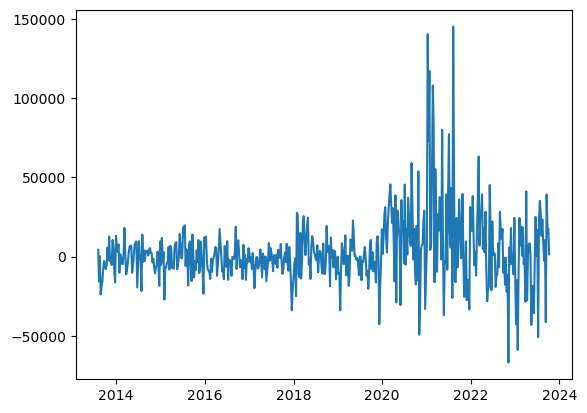

In [37]:
plt.plot(pd.to_datetime(data_raw_weekly.index), data_raw_weekly['개인'])

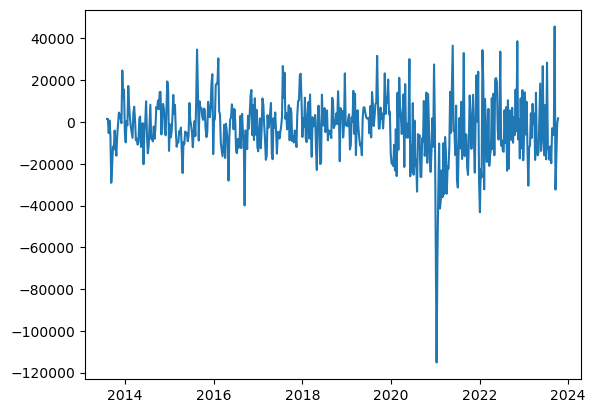

In [38]:
plt.plot(pd.to_datetime(data_raw_weekly.index), data_raw_weekly['기관계'])

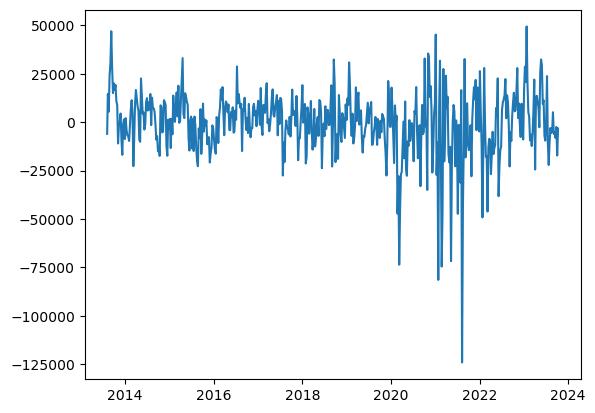

In [39]:
plt.plot(pd.to_datetime(data_raw_weekly.index), data_raw_weekly['외국인'])

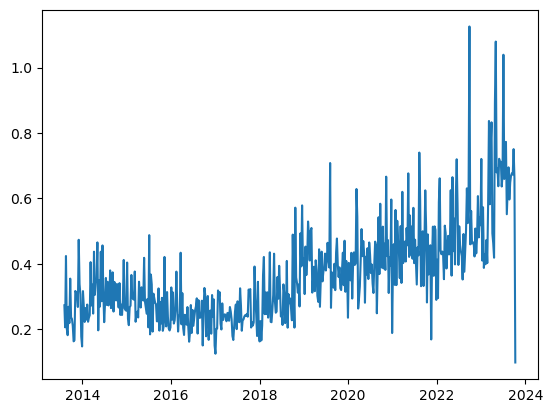

In [40]:
plt.plot(pd.to_datetime(data_raw_weekly.index), data_raw_weekly['미수금_대비_반대매매_비중'])

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_weekly = pd.read_csv("data_raw_weekly.csv", index_col=0)

In [3]:
data_weekly

,weekth,KOSPI,KOSDAQ,개인,외국인,기관계,금융투자,보험,투신(사모),은행,...,회사채_BBB,원자료_AA_민평,MMF_7d,Kospi200_fu,Kospi200,us_rate_3m,us_rate_5y,us_rate_10y,us_rate_30y,gold
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,0,1906.619995,557.359985,3339,-4984,1528,-368,-428,-542,-354,...,9.020,3.310,2.49,246.50,246.80,0.051,1.390,2.642,3.729,1282.5
2013-08-12,1,1884.829956,550.250000,-8696,6761,1974,-1232,-122,1220,-513,...,8.990,3.280,2.49,244.30,243.78,0.058,1.385,2.622,3.683,1334.2
2013-08-19,2,1917.640015,550.489990,1319,3105,-4182,-2615,-543,-1451,-1472,...,9.080,3.360,2.49,249.20,248.89,0.056,1.609,2.882,3.901,1365.7
2013-08-26,3,1887.859985,533.729980,-15146,13963,1755,-1668,613,955,-399,...,9.010,3.310,2.49,245.60,245.71,0.041,1.590,2.787,3.767,1393.1
2013-09-02,4,1926.359985,516.739990,-14187,20299,-2229,-1282,-207,-2857,-1441,...,8.990,3.300,2.48,251.85,251.13,0.030,1.693,2.835,3.736,1412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11,526,2556.879883,912.549988,-18839,-6322,24341,21987,-189,3212,-61,...,11.042,4.619,3.73,338.05,337.58,5.460,4.415,4.294,4.376,1947.2
2023-09-18,527,2574.719971,891.289978,23771,-6730,-17920,-14390,-158,-2234,81,...,11.074,4.651,3.76,342.95,340.67,5.465,4.449,4.303,4.383,1953.4
2023-09-25,528,2514.969971,860.679993,13523,-1341,-12738,-10390,-186,-1370,67,...,11.060,4.648,3.78,333.10,331.58,5.481,4.612,4.531,4.648,1936.6
